In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
import statistics
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

CSV file loaded successfully!
median for channel 1 = 6.5
median for channel 2 = 10.5
median for channel 3 = None


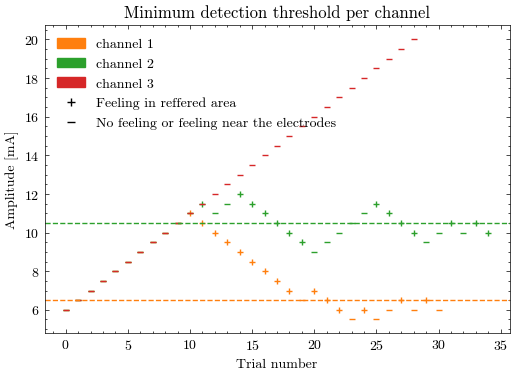

In [5]:
def wantedState(feelSomething, where):
    return feelSomething == 'Yes' and where == 'Referred area'

def GetMedian(group):
    inv_points = []
    for i in range(1, len(group)):
        if wantedState(group.iloc[i]['feelSomething'], group.iloc[i]['where']) != wantedState(group.iloc[i-1]['feelSomething'], group.iloc[i-1]['where']):
            if wantedState(group.iloc[i]['feelSomething'], group.iloc[i]['where']):
                inv_points.append(group.iloc[i]['demand'])
            else:
                inv_points.append(group.iloc[i-1]['demand'])
    
    median = statistics.median(inv_points) if len(inv_points)!=0 else None
    return median

csv_file = 'recorded_data\\Habib\\2024-11-28_09-59-33_PA_variable.csv'  # Replace with your CSV file name
#csv_file = 'recorded_data\\2024-12-06_10-28-30_min_threshold_PA_variable.csv'
try:
    min_data = pd.read_csv(csv_file)
    print("CSV file loaded successfully!")
except FileNotFoundError:
    print(f"File {csv_file} not found.")
    exit()


grouped_data = min_data.groupby('currentChannel')

colors = plt.cm.tab10.colors
handles = []
with plt.style.context(['science','no-latex']):
    fig, ax = plt.subplots(figsize=(6, 4))
    for channel, group in grouped_data:
        color = colors[channel]
        label_added = False

        for _, row in group.iterrows():
            m = '+' if (row['feelSomething'] == 'Yes' and row['where'] == 'Referred area') else '_'

            if not label_added:
                ax.scatter(row['#'], row['demand'], color=color, s=15, marker=m)
                handles.append(mpatches.Patch(color=color, label=f'channel {channel}'))
                label_added = True
            else:
                ax.scatter(row['#'], row['demand'], color=color, s=15, marker=m)

        median = GetMedian(group)
        if median != None:     # took out channel 1 
            ax.axhline(median, color=color, linestyle = '--') 
        print(f'median for channel {channel} = {median}')
    handles2 = [
    mlines.Line2D([], [], color='black', marker='+', linestyle='None', label='Feeling in reffered area'),
    mlines.Line2D([], [], color='black', marker='_', linestyle='None', label='No feeling or feeling near the electrodes')
    ]
    ax.legend(handles=handles + handles2)
    plt.xlabel('Trial number')
    plt.ylabel('Amplitude [mA]')
    plt.title(f'Minimum detection threshold per channel')
    plt.show()

CSV file loaded successfully!
median for channel 2 = 23.25
median for channel 3 = 22.0


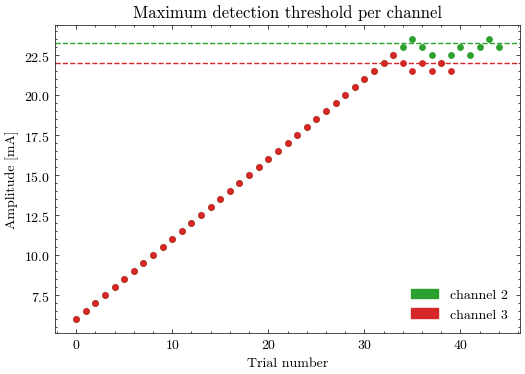

In [7]:
def GetMedianMax(group):
    inv_points = []
    for i in range(1, len(group)):
        if (group.iloc[i]['pain'] > 7 and group.iloc[i-1]['pain'] <= 7):
                inv_points.append(group.iloc[i]['demand'])
        elif (group.iloc[i]['pain'] <= 7 and group.iloc[i-1]['pain'] > 7):
            inv_points.append(group.iloc[i-1]['demand'])
    
    median = statistics.median(inv_points) if len(inv_points)!=0 else None
    return median

csv_file = 'recorded_data\\Habib\\2024-12-06_09-25-08_PA_variable.csv'  # Replace with your CSV file name
try:
    max_data = pd.read_csv(csv_file)
    print("CSV file loaded successfully!")
except FileNotFoundError:
    print(f"File {csv_file} not found.")
    exit()

grp_maxdata = max_data.groupby('currentChannel')

colors = plt.cm.tab10.colors
handles = []
with plt.style.context(['science','no-latex']):
    fig, ax = plt.subplots(figsize=(6, 4))
    for channel, group in grp_maxdata:
        color = colors[channel]
        label_added = False

        for _, row in group.iterrows():

            if not label_added:
                ax.scatter(row['#'], row['demand'], color=color, s=15, marker='o')
                handles.append(mpatches.Patch(color=color, label=f'channel {channel}'))
                label_added = True
            else:
                ax.scatter(row['#'], row['demand'], color=color, s=15, marker='o')

        median = GetMedianMax(group)
        if median != None:
            ax.axhline(median, color=color, linestyle = '--') 
        print(f'median for channel {channel} = {median}')
    ax.legend(handles=handles )
    plt.xlabel('Trial number')
    plt.ylabel('Amplitude [mA]')
    plt.title(f'Maximum detection threshold per channel')
    plt.show()